In [5]:
from Bio import SeqIO
from io import StringIO
from Bio import AlignIO
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Align.Applications import MuscleCommandline
import subprocess

## Making the sequences

#### Turtles

In [6]:
#Reading the sequences from FASTA files
t1 = SeqIO.read("sequences/sequence_turtle1.fasta", "fasta")
t2 = SeqIO.read("sequences/sequence_turtle2.fasta", "fasta")
t3 = SeqIO.read("sequences/sequence_turtle3.fasta", "fasta")
t4 = SeqIO.read("sequences/sequence_turtle4.fasta", "fasta")

#Putting an id
t1.id = 'TGreen turtle'
t2.id = 'TDummy turtle'
t3.id = 'Tsmall turtle'
t4.id = 'TGreek trutle'

#Put them into one file of all the turtles
turtles = SeqIO.write([t1,t2,t3,t4], "sequences/turtles.fasta", "fasta")

#### Lizards

In [7]:
#Reading the sequences from FASTA files
l1 = SeqIO.read("sequences/sequence_lizard1.fasta", "fasta")
l2 = SeqIO.read("sequences/sequence_lizard2.fasta", "fasta")
l3 = SeqIO.read("sequences/sequence_lizard3.fasta", "fasta")
l4 = SeqIO.read("sequences/sequence_lizard4.fasta", "fasta")

#Putting an id
l1.id = 'LOccidental lizard'
l2.id = 'LKomodo lizard'
l3.id = 'LBearded lizard'
l4.id = 'LAnolis lizard'

#Put them into one file of all the lizards
lizards = SeqIO.write([l1,l2,l3,l4], "sequences/lizards.fasta", "fasta")

#### Cocodriles

In [8]:
#Reading the sequences from FASTA files
c1 = SeqIO.read("sequences/sequence_cocodrile1.fasta", "fasta")
c2 = SeqIO.read("sequences/sequence_cocodrile2.fasta", "fasta")
c3 = SeqIO.read("sequences/sequence_cocodrile3.fasta", "fasta")
c4 = SeqIO.read("sequences/sequence_cocodrile4.fasta", "fasta")

#Putting an id
c1.id = 'CNile cocodrile'
c2.id = 'CMisissipi Alligator'
c3.id = 'CTiny cocodrile'
c4.id = 'CAfrican cocodrile'

#Put them into one file of all the cocodriles
cocrodiles = SeqIO.write([c1,c2,c3,c4], "sequences/cocodriles.fasta", "fasta")

#### Birds

In [9]:
#Reading the sequences from FASTA files
b1 = SeqIO.read("sequences/sequence_bird1.fasta", "fasta")
b2 = SeqIO.read("sequences/sequence_bird2.fasta", "fasta")
b3 = SeqIO.read("sequences/sequence_bird3.fasta", "fasta")
b4 = SeqIO.read("sequences/sequence_bird4.fasta", "fasta")

#Putting an id
b1.id = 'BRooster bird'
b2.id = 'BZebra bird'
b3.id = 'BPigeon bird'
b4.id = 'BOstrich'

#Put them into one file of all the cocodriles
birds = SeqIO.write([b1,b2,b3,b4], "sequences/birds.fasta", "fasta")

In [10]:
#Putting all the sequences of all the animals in one
all_sequences = list(SeqIO.parse("sequences/turtles.fasta", "fasta")) + \
                list(SeqIO.parse("sequences/lizards.fasta", "fasta")) + \
                list(SeqIO.parse("sequences/cocodriles.fasta", "fasta")) + \
                list(SeqIO.parse("sequences/birds.fasta", "fasta"))

SeqIO.write(all_sequences, "sequences/all_sequences.fasta", "fasta")

16

## Alignning sequences

### All animals

In [11]:
#Clustal
subprocess.run(["clustalo", "-i", "sequences/all_sequences.fasta", "-o", 
                "alignments/all_aligned_clustal.aln", "--force", "--outfmt=clu"])

all_alignment_clustal = AlignIO.read("alignments/all_aligned_clustal.aln", "clustal")
print(all_alignment_clustal)

Alignment with 16 rows and 18954 columns
--------------------------------------------...--- TGreen
--------------------------------------------...--- TDummy
--------------------------------------------...--- Tsmall
--------------------------------------------...--- TGreek
--------------------------------------------...--- LOccidental
--------------------------------------------...--- LKomodo
GTCATTGTAGCTTACCAC-CAAAGCATAGTGCTGAAGACACTAA...--- LBearded
GTTATTGTAGCTTACAAATTAAAGCACGGCACTGAAAATGCCAC...CGT LAnolis
--------------------------------------------...--- CNile
--------------------------------------------...--- CMisissipi
--------------------------------------------...--- CTiny
--------------------------------------------...--- CAfrican
--------------------------------------------...--- BRooster
--------------------------------------------...--- BZebra
--------------------------------------------...--- BPigeon
--------------------------------------------...--- BOstrich


In [12]:
#Muscle
subprocess.run(["muscle", "-align", "sequences/all_sequences.fasta", "-output", "alignments/all_aligned_muscle.aln"])

all_alignment_muscle = AlignIO.read("alignments/all_aligned_muscle.aln", "fasta")
print(all_alignment_muscle)


muscle 5.3.osxarm64 [6d49a2f]  8.6Gb RAM, 8 cores
Built Nov 11 2024 03:02:22
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

[align sequences/all_sequences.fasta]
Input: 16 seqs, avg length 3124, max 17223, min 240

00:00 12Mb    100.0% Derep 16 uniques, 0 dupes
00:00 12Mb   CPU has 8 cores, running 8 threads
01:39 233Mb   100.0% Calc posteriors
01:40 235Mb   100.0% UPGMA5         
01:41 457Mb   100.0% Consistency (1/2)
01:42 393Mb   100.0% Consistency (2/2)
02:23 173Mb   100.0% Refining         


Alignment with 16 rows and 18916 columns
GTCATTGTAGCTTACC-ACCAAAGCATAGTGCTGAAGACACTAA...CCC LBearded
GTTATTGTAGCTTACAAATTAAAGCACGGCACTGAAAATGCCAC...CGT LAnolis
--------------------------------------------...ACT CTiny
TTGTGG----C---------------------------------...ATA LKomodo
--------------------------------------------...--A CAfrican
--------------------------------------------...-CC Tsmall
--------------------------------------------...-TC BPigeon
--------------------------------------------...AGC BOstrich
--------------------------------------------...AGC BZebra
--------------------------------------------...AAA LOccidental
--------------------------------------------...-CC BRooster
--------------------------------------------...-TA TGreek
--------------------------------------------...-AA TGreen
--------------------------------------------...-AA TDummy
ATGACC--------------------------------------...--- CNile
--------------------------------------------...--- CMisissipi


#### Turtles and Crocodriles

**Analysis of the turtle and crocodrile data** 

In [13]:
#First we put both files of sequences turtles and cocodriles on a single one file
turtles_cocodriles = list(SeqIO.parse("sequences/turtles.fasta", "fasta")) + \
                list(SeqIO.parse("sequences/cocodriles.fasta", "fasta"))
SeqIO.write(turtles_cocodriles, "sequences/turtles_cocodriles_sequences.fasta", "fasta")

8

**Alignments**

In [14]:
#Muscle
subprocess.run(["muscle", "-align", "sequences/turtles_cocodriles_sequences.fasta", "-output", "alignments/turtles_cocodriles_aligned_muscle.aln"])

alignment_turtles_cocodriles_muscle = AlignIO.read("alignments/turtles_cocodriles_aligned_muscle.aln", "fasta")
print(alignment_turtles_cocodriles_muscle)


muscle 5.3.osxarm64 [6d49a2f]  8.6Gb RAM, 8 cores
Built Nov 11 2024 03:02:22
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

[align sequences/turtles_cocodriles_sequences.fasta]
Input: 8 seqs, avg length 508, max 801, min 240

00:00 12Mb    100.0% Derep 8 uniques, 0 dupes
00:00 12Mb   CPU has 8 cores, running 8 threads
00:00 188Mb   100.0% Calc posteriors
00:01 135Mb   100.0% UPGMA5         
00:01 143Mb   100.0% Consistency (1/2)
00:01 146Mb   100.0% Consistency (2/2)


Alignment with 8 rows and 1191 columns
--------------------------------------------...--T CTiny
--------------------------------------------...GCC Tsmall
--------------------------------------------...--- CAfrican
--------------------------------------------...--A TGreek
--------------------------------------------...--A TGreen
--------------------------------------------...--A TDummy
ATGACCCACCAACTACGAAAATCCCACCCACTTTTAAAACTAGT...--T CNile
--------------------------------------------...--- CMisissipi


00:01 159Mb   100.0% Refining


In [15]:
#Clustal
subprocess.run(["clustalo", "-i", "sequences/turtles_cocodriles_sequences.fasta", "-o", 
                "alignments/turtles_cocodriles_aligned_clustal.aln", "--force", "--outfmt=clu"])

alignment_turtles_cocodriles_clustal = AlignIO.read("alignments/turtles_cocodriles_aligned_clustal.aln", "clustal")
print(alignment_turtles_cocodriles_clustal)

Alignment with 8 rows and 1156 columns
--------------------------------------------...--- TGreen
--------------------------------------------...--- TDummy
--------------------------------------------...--- Tsmall
--------------------------------------------...--- TGreek
ATGACCCACCAACTACGAAAATCCCACCCACTTTTAAAACTAGT...--- CNile
--------------------------------------------...--- CMisissipi
--------------------------------------------...ACT CTiny
--------------------------------------------...--- CAfrican


#### Lizards and birds
**Anlysis of the Lizards and birds data** 

In [16]:
#First we put both files of sequences lizards and birds on a single one file
lizards_birds = list(SeqIO.parse("sequences/lizards.fasta", "fasta")) + \
                list(SeqIO.parse("sequences/birds.fasta", "fasta"))
SeqIO.write(lizards_birds, "sequences/lizards_birds_sequences.fasta", "fasta")

8

**Alignment**

In [17]:
#Clustal
subprocess.run(["clustalo", "-i", "sequences/lizards_birds_sequences.fasta", "-o", 
                "alignments/lizards_birds_aligned_clustal.aln", "--force", "--outfmt=clu"])

alignment_lizards_birds_clustal = AlignIO.read("alignments/lizards_birds_aligned_clustal.aln", "clustal")
print(alignment_lizards_birds_clustal)

Alignment with 8 rows and 18968 columns
--------------------------------------------...--- LOccidental
--------------------------------------------...--- LKomodo
GTCATTGTAGCTTACCAC-CAAAGCATAGTGCTGAAGACACTAA...--- LBearded
GTTATTGTAGCTTACAAATTAAAGCACGGCACTGAAAATGCCAC...CGT LAnolis
--------------------------------------------...--- BRooster
--------------------------------------------...--- BZebra
--------------------------------------------...--- BPigeon
--------------------------------------------...--- BOstrich


In [18]:
#Muscle
subprocess.run(["muscle", "-align", "sequences/lizards_birds_sequences.fasta", "-output", "alignments/llizards_birds_aligned_muscle.aln"])

alignment_lizards_birds_muscle = AlignIO.read("alignments/llizards_birds_aligned_muscle.aln", "fasta")
print(alignment_lizards_birds_muscle)


muscle 5.3.osxarm64 [6d49a2f]  8.6Gb RAM, 8 cores
Built Nov 11 2024 03:02:22
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

[align sequences/lizards_birds_sequences.fasta]
Input: 8 seqs, avg length 5740, max 17223, min 287

00:00 12Mb    100.0% Derep 8 uniques, 0 dupes
00:00 12Mb   CPU has 8 cores, running 8 threads
01:33 45Mb    100.0% Calc posteriors
01:35 107Mb   100.0% UPGMA5         
01:35 335Mb   100.0% Consistency (1/2)
01:35 362Mb   100.0% Consistency (2/2)
02:13 448Mb   100.0% Refining         


Alignment with 8 rows and 18916 columns
GTCATTGTAGCTTACC-ACCAAAGCATAGTGCTGAAGACACTAA...CCC LBearded
GTTATTGTAGCTTACAAATTAAAGCACGGCACTGAAAATGCCAC...CGT LAnolis
TTGT----GGC---------------------------------...ATA LKomodo
--------------------------------------------...--C BPigeon
--------------------------------------------...AGC BOstrich
--------------------------------------------...AGC BZebra
TTGT----AAA---------------------------------...AAA LOccidental
--------------------------------------------...-CC BRooster


## Building trees

In [19]:
from utils import jukes_cantor_distance, kimura_distance, compute_distance_matrix

### Building the distance matrixs

#### All

In [20]:
#Kimura
ids, matrix_all_clustal_kimura = compute_distance_matrix(all_alignment_clustal, kimura_distance)
ids, matrix_all_muscle_kimura = compute_distance_matrix(all_alignment_muscle, kimura_distance)

#Jukes cantor
ids, matrix_all_clustal_jc = compute_distance_matrix(all_alignment_clustal, jukes_cantor_distance)
ids, matrix_all_muscle_jc = compute_distance_matrix(all_alignment_muscle, jukes_cantor_distance)


#### Turtles and Cocodriles

In [21]:
#Kimura
ids, matrix_turtles_cocodriles_clustal_kimura = compute_distance_matrix(alignment_turtles_cocodriles_clustal, kimura_distance)
ids, matrix_turtles_cocodriles_muscle_kimura = compute_distance_matrix(alignment_turtles_cocodriles_muscle, kimura_distance)

#Jukes cantor
ids, matrix_turtles_cocodriles_clustal_jc = compute_distance_matrix(alignment_turtles_cocodriles_clustal, jukes_cantor_distance)
ids, matrix_turtles_cocodriles_muscle_jc = compute_distance_matrix(alignment_turtles_cocodriles_muscle, jukes_cantor_distance)


#### Lizards and birds

In [22]:
#Kimura
ids, matrix_lizards_birds_clustal_kimura = compute_distance_matrix(alignment_lizards_birds_clustal, kimura_distance)
ids, matrix_lizards_birds_muscle_kimura = compute_distance_matrix(alignment_lizards_birds_muscle, kimura_distance)

#Jukes cantor
ids, matrix_lizards_birds_clustal_jc = compute_distance_matrix(alignment_lizards_birds_clustal, jukes_cantor_distance)
ids, matrix_lizards_birds_muscle_jc = compute_distance_matrix(alignment_lizards_birds_muscle, jukes_cantor_distance)


### In ```biopython```

In [23]:
from utils import matrix_to_biopython

In [24]:

ids_turtle_cocodriles = ["TGreen", "TDummy", "Tsmall", "TGreek", "CNile", "CMisissipi", "CTiny", "CAfrican"]
ids_all = ["TGreen", "TDummy", "Tsmall", "TGreek", "LOccidental", "LKomodo", "LBearded", "LAnolis", "CNile", "CMisissipi", "CTiny", "CAfrican", "BRooster", "BZebra", "BPigeon", "BOstrich"]
ids_lizards_birds = ["LOccidental", "LKomodo", "LBearded", "LAnolis", "BRooster", "BZebra", "BPigeon", "BOstrich"]


try:
    #MATRIX ALL
    #Kimura
    matrix_all_clustal_kimura_bio = matrix_to_biopython(ids_all, matrix_all_clustal_kimura)
    matrix_all_muscle_kimura_bio = matrix_to_biopython(ids_all, matrix_all_muscle_kimura)

    #Jukes-Cantor
    matrix_all_clustal_jc_bio = matrix_to_biopython(ids_all, matrix_all_clustal_jc)
    matrix_all_muscle_jc_bio = matrix_to_biopython(ids_all, matrix_all_muscle_jc)

    
    #MATRIX TURTLES-COCODRILES
    #Kimura
    matrix_turtles_cocodriles_clustal_kimura_bio = matrix_to_biopython(ids_turtle_cocodriles, matrix_turtles_cocodriles_clustal_kimura)
    matrix_turtles_cocodriles_muscle_kimura_bio = matrix_to_biopython(ids_turtle_cocodriles, matrix_turtles_cocodriles_clustal_kimura)
    
    #Jukes-Cantor
    matrix_turtles_cocodriles_clustal_jc_bio = matrix_to_biopython(ids_turtle_cocodriles, matrix_turtles_cocodriles_clustal_jc)
    matrix_turtles_cocodriles_muscle_jc_bio = matrix_to_biopython(ids_turtle_cocodriles, matrix_turtles_cocodriles_muscle_jc)

    #MATRIX LIZARDS-BIRDS
    matrix_lizards_birds_clustal_kimura_bio = matrix_to_biopython(ids_lizards_birds, matrix_lizards_birds_clustal_kimura)
    matrix_lizards_birds_muscle_kimura_bio = matrix_to_biopython(ids_lizards_birds, matrix_lizards_birds_muscle_kimura)

    #Jukes-Cantor
    matrix_lizards_birds_clustal_jc_bio = matrix_to_biopython(ids_lizards_birds, matrix_lizards_birds_clustal_jc)
    matrix_lizards_birds_muscle_jc_bio = matrix_to_biopython(ids_lizards_birds, matrix_lizards_birds_muscle_jc)

except ValueError as e:
    print(e)



### Identity

In [25]:
#MATRIX IDENTITY ALL
calculator = DistanceCalculator('identity')
matrix_id_all_clustal = calculator.get_distance(all_alignment_clustal)
matrix_id_all_muscle = calculator.get_distance(all_alignment_muscle)

#MATRIX IDENTITY TURTLES-COCODRILES
calculator = DistanceCalculator('identity')
matrix_id_turtles_cocodriles_clustal = calculator.get_distance(alignment_turtles_cocodriles_clustal)
matrix_id_turtles_cocodriles_muscle = calculator.get_distance(alignment_turtles_cocodriles_muscle)

#MATRIX IDENTITY LIZARDS-BIRDS
calculator = DistanceCalculator('identity')
matrix_id_lizards_birds_clustal = calculator.get_distance(alignment_lizards_birds_clustal)
matrix_id_lizards_birds_muscle = calculator.get_distance(alignment_lizards_birds_muscle)

In [26]:
from utils import clean_distance_matrix

#### Cleanning matrix

In [28]:
#MATRIX ALL
#Kimura
matrix_all_clustal_kimura_bio_clean = clean_distance_matrix(matrix_all_clustal_kimura_bio)
matrix_all_muscle_kimura_bio_clean = clean_distance_matrix(matrix_all_muscle_kimura_bio)

#Jukes-Cantor
matrix_all_clustal_jc_bio_clean = clean_distance_matrix(matrix_all_clustal_jc_bio)
matrix_all_muscle_jc_bio_clean = clean_distance_matrix(matrix_all_muscle_jc_bio)

#Identity
matrix_id_all_clustal_clean = clean_distance_matrix(matrix_id_all_clustal)
matrix_id_all_muscle_clean = clean_distance_matrix(matrix_id_all_muscle)


#MATRIX TURTLES-COCODRILES
#Kimura
matrix_turtles_cocodriles_clustal_kimura_bio_clean = clean_distance_matrix(matrix_turtles_cocodriles_clustal_kimura_bio)
matrix_turtles_cocodriles_muscle_kimura_bio_clean = clean_distance_matrix(matrix_turtles_cocodriles_muscle_kimura_bio)

#Jukes-Cantor
matrix_turtles_cocodriles_clustal_jc_bio_clean = clean_distance_matrix(matrix_turtles_cocodriles_clustal_jc_bio)
matrix_turtles_cocodriles_muscle_jc_bio_clean = clean_distance_matrix(matrix_turtles_cocodriles_muscle_jc_bio)

#Identity
matrix_id_turtles_cocodriles_clustal_clean = clean_distance_matrix(matrix_id_turtles_cocodriles_clustal)
matrix_id_turtles_cocodriles_muscle_clean = clean_distance_matrix(matrix_id_turtles_cocodriles_muscle)

#MATRIX LIZARDS-BIRDS
matrix_lizards_birds_clustal_kimura_bio_clean = clean_distance_matrix(matrix_lizards_birds_clustal_kimura_bio)
matrix_lizards_birds_muscle_kimura_bio_clean = clean_distance_matrix(matrix_lizards_birds_muscle_kimura_bio)

#Jukes-Cantor
matrix_lizards_birds_clustal_jc_bio_clean = clean_distance_matrix(matrix_lizards_birds_clustal_jc_bio)
matrix_lizards_birds_muscle_jc_bio_clean = clean_distance_matrix(matrix_lizards_birds_muscle_jc_bio)

#Identity
matrix_id_lizards_birds_clustal_clean = clean_distance_matrix(matrix_id_lizards_birds_clustal)
matrix_id_lizards_birds_muscle_clean = clean_distance_matrix(matrix_id_lizards_birds_muscle)


### Building the trees

#### All

In [29]:
constructor = DistanceTreeConstructor()

#UPGMA trees
#Kimura
tree_all_clustal_kimura_upgma = constructor.upgma(matrix_all_clustal_kimura_bio)
tree_all_muscle_kimura_upgma = constructor.upgma(matrix_all_muscle_kimura_bio)
#Jukes-cantor
tree_all_clustal_jc_upgma = constructor.upgma(matrix_all_clustal_jc_bio)
tree_all_muscle_jc_upgma = constructor.upgma(matrix_all_muscle_jc_bio)
#Identity
tree_all_clustal_id_upgma = constructor.upgma(matrix_id_all_clustal)
tree_all_muscle_id_upgma = constructor.upgma(matrix_id_all_muscle)

#Neighboor Joinning trees
#Kimura
tree_all_clustal_kimura_nj = constructor.nj(matrix_all_clustal_kimura_bio)
tree_all_muscle_kimura_nj = constructor.nj(matrix_all_muscle_kimura_bio)
#Jukes-cantor
tree_all_clustal_jc_nj = constructor.nj(matrix_all_clustal_jc_bio)
tree_all_muscle_jc_nj = constructor.nj(matrix_all_muscle_jc_bio)
#Identity
tree_all_clustal_id_nj = constructor.nj(matrix_id_all_clustal)
tree_all_muscle_id_nj = constructor.nj(matrix_id_all_muscle)

#### Turtles-Cocodriles

In [30]:
#UPGMA trees
#Kimura
tree_turtles_cocodriles_clustal_kimura_upgma = constructor.upgma(matrix_turtles_cocodriles_clustal_kimura_bio)
tree_turtles_cocodriles_muscle_kimura_upgma = constructor.upgma(matrix_turtles_cocodriles_muscle_kimura_bio)
#Jukes-cantor
tree_turtles_cocodriles_clustal_jc_upgma = constructor.upgma(matrix_turtles_cocodriles_clustal_jc_bio)
tree_turtles_cocodriles_muscle_jc_upgma = constructor.upgma(matrix_turtles_cocodriles_muscle_jc_bio)
#Identity
tree_turtles_cocodriles_clustal_id_upgma = constructor.upgma(matrix_id_turtles_cocodriles_clustal)
tree_turtles_cocodriles_muscle_id_upgma = constructor.upgma(matrix_id_turtles_cocodriles_muscle)

#Neighboor Joinning trees
#Kimura
tree_turtles_cocodriles_clustal_kimura_nj = constructor.nj(matrix_turtles_cocodriles_clustal_kimura_bio)
tree_turtles_cocodriles_muscle_kimura_nj = constructor.nj(matrix_turtles_cocodriles_muscle_kimura_bio)
#Jukes-cantor
tree_turtles_cocodriles_clustal_jc_nj = constructor.nj(matrix_turtles_cocodriles_clustal_jc_bio)
tree_turtles_cocodriles_muscle_jc_nj = constructor.nj(matrix_turtles_cocodriles_muscle_jc_bio)
#Identity
tree_turtles_cocodriles_clustal_id_nj = constructor.nj(matrix_id_turtles_cocodriles_clustal)
tree_turtles_cocodriles_muscle_id_nj = constructor.nj(matrix_id_turtles_cocodriles_muscle)

#### Lizards-Birds

In [31]:
#UPGMA trees
#Kimura
tree_lizards_birds_clustal_kimura_upgma = constructor.upgma(matrix_lizards_birds_clustal_kimura_bio)
tree_lizards_birds_muscle_kimura_upgma = constructor.upgma(matrix_lizards_birds_muscle_kimura_bio)
#Jukes-cantor
tree_lizards_birds_clustal_jc_upgma = constructor.upgma(matrix_lizards_birds_clustal_jc_bio)
tree_lizards_birds_muscle_jc_upgma = constructor.upgma(matrix_lizards_birds_muscle_jc_bio)
#Identity
tree_lizards_birds_clustal_id_upgma = constructor.upgma(matrix_id_lizards_birds_clustal)
tree_lizards_birds_muscle_id_upgma = constructor.upgma(matrix_id_lizards_birds_muscle)

#Neighboor Joinning trees
#Kimura
tree_lizards_birds_clustal_kimura_nj = constructor.nj(matrix_lizards_birds_clustal_kimura_bio)
tree_lizards_birds_muscle_kimura_nj = constructor.nj(matrix_lizards_birds_muscle_kimura_bio)
#Jukes-cantor
tree_lizards_birds_clustal_jc_nj = constructor.nj(matrix_lizards_birds_clustal_jc_bio)
tree_lizards_birds_muscle_jc_nj = constructor.nj(matrix_lizards_birds_muscle_jc_bio)
#Identity
tree_lizards_birds_clustal_id_nj = constructor.nj(matrix_id_lizards_birds_clustal)
tree_lizards_birds_muscle_id_nj = constructor.nj(matrix_id_lizards_birds_muscle)

### It's ready

In [33]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 31.7 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 29.3 MB/s eta 0:00:00
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


#### Now you can draw, write and compare the trees

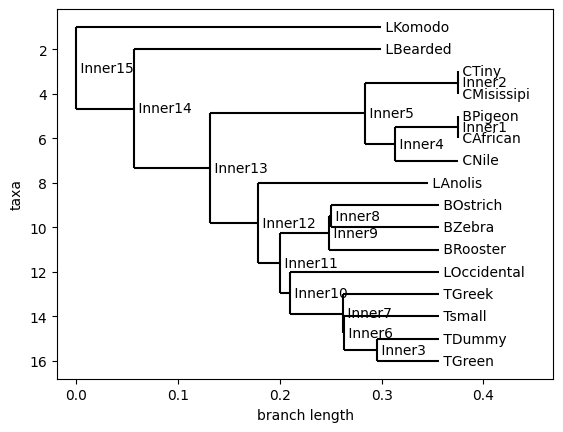

In [45]:
Phylo.draw(tree_all_clustal_kimura_upgma)

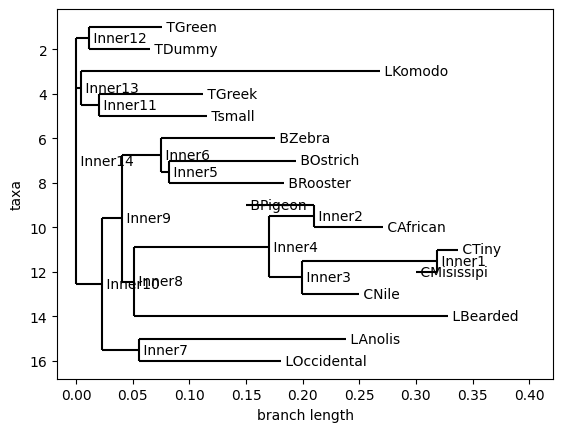

In [46]:
Phylo.draw(tree_all_clustal_jc_nj)

##### You can save them into the img folder

In [42]:
import matplotlib.pyplot as plt
from Bio import Phylo

#Draw the tree
Phylo.draw(tree_all_clustal_kimura_upgma, do_show=False)

# Sve the figure in the img folder
plt.savefig('img/tree_all_clustal_kimura_upgma.png')
plt.close()

In [44]:
#Draw the tree
Phylo.draw(tree_all_clustal_jc_nj, do_show=False)

# Sve the figure in the img folder
plt.savefig('img/tree_all_clustal_jc_nj.png')
plt.close()

#### But before to compare them let's save them into newick format

In [49]:
#ALL
Phylo.write(tree_all_clustal_kimura_upgma, "trees/all/tree_all_clustal_kimura_upgma.nwk", "newick")
Phylo.write(tree_all_muscle_kimura_upgma, "trees/all/tree_all_muscle_kimura_upgma.nwk", "newick")

Phylo.write(tree_all_clustal_jc_upgma, "trees/all/tree_all_clustal_jc_upgma.nwk", "newick")
Phylo.write(tree_all_muscle_jc_upgma, "trees/all/tree_all_muscle_jc_upgma.nwk", "newick")

Phylo.write(tree_all_clustal_id_upgma, "trees/all/tree_all_clustal_id_upgma.nwk", "newick")
Phylo.write(tree_all_muscle_id_upgma, "trees/all/tree_all_muscle_id_upgma.nwk", "newick")


Phylo.write(tree_all_clustal_kimura_nj, "trees/all/tree_all_clustal_kimura_nj.nwk", "newick")
Phylo.write(tree_all_muscle_kimura_nj, "trees/all/tree_all_muscle_kimura_nj.nwk", "newick")

Phylo.write(tree_all_clustal_jc_nj, "trees/all/tree_all_clustal_jc_nj.nwk", "newick")
Phylo.write(tree_all_muscle_jc_nj, "trees/all/tree_all_muscle_jc_nj.nwk", "newick")

Phylo.write(tree_all_clustal_id_nj, "trees/all/tree_all_clustal_id_nj.nwk", "newick")
Phylo.write(tree_all_muscle_id_nj, "trees/all/tree_all_muscle_id_nj.nwk", "newick")

1

In [52]:
#TURTLES-CROCODRILES
Phylo.write(tree_turtles_cocodriles_clustal_kimura_upgma, "trees/turtles_crocodiles/tree_turtles_cocodriles_clustal_kimura_upgma.nwk", "newick")
Phylo.write(tree_turtles_cocodriles_muscle_kimura_upgma, "trees/turtles_crocodiles/tree_turtles_cocodriles_muscle_kimura_upgma.nwk", "newick")

Phylo.write(tree_turtles_cocodriles_clustal_jc_upgma, "trees/turtles_crocodiles/tree_turtles_cocodriles_clustal_jc_upgma.nwk", "newick")
Phylo.write(tree_turtles_cocodriles_muscle_jc_upgma, "trees/turtles_crocodiles/tree_turtles_cocodriles_muscle_jc_upgma.nwk", "newick")

Phylo.write(tree_turtles_cocodriles_clustal_id_upgma, "trees/turtles_crocodiles/tree_turtles_cocodriles_clustal_id_upgma.nwk", "newick")
Phylo.write(tree_turtles_cocodriles_muscle_id_upgma, "trees/turtles_crocodiles/tree_turtles_cocodriles_muscle_id_upgma.nwk", "newick")


Phylo.write(tree_turtles_cocodriles_clustal_kimura_nj, "trees/turtles_crocodiles/tree_turtles_cocodriles_clustal_kimura_nj.nwk", "newick")
Phylo.write(tree_turtles_cocodriles_muscle_kimura_nj, "trees/turtles_crocodiles/tree_turtles_cocodriles_muscle_kimura_nj.nwk", "newick")

Phylo.write(tree_turtles_cocodriles_clustal_jc_nj, "trees/turtles_crocodiles/tree_turtles_cocodriles_clustal_jc_nj.nwk", "newick")
Phylo.write(tree_turtles_cocodriles_muscle_jc_nj, "trees/turtles_crocodiles/tree_turtles_cocodriles_muscle_jc_nj.nwk", "newick")

Phylo.write(tree_turtles_cocodriles_clustal_id_nj, "trees/turtles_crocodiles/tree_turtles_cocodriles_clustal_id_nj.nwk", "newick")
Phylo.write(tree_turtles_cocodriles_muscle_id_nj, "trees/turtles_crocodiles/tree_turtles_cocodriles_muscle_id_nj.nwk", "newick")

1

In [53]:
#LIZARDS-BIRDS
Phylo.write(tree_lizards_birds_clustal_kimura_upgma, "trees/lizards_birds/tree_lizards_birds_clustal_kimura_upgma.nwk", "newick")
Phylo.write(tree_lizards_birds_muscle_kimura_upgma, "trees/lizards_birds/tree_lizards_birds_muscle_kimura_upgma.nwk", "newick")

Phylo.write(tree_lizards_birds_clustal_jc_upgma, "trees/lizards_birds/tree_lizards_birds_clustal_jc_upgma.nwk", "newick")
Phylo.write(tree_lizards_birds_muscle_jc_upgma, "trees/lizards_birds/tree_lizards_birds_muscle_jc_upgma.nwk", "newick")

Phylo.write(tree_lizards_birds_clustal_id_upgma, "trees/lizards_birds/tree_lizards_birds_clustal_id_upgma.nwk", "newick")
Phylo.write(tree_lizards_birds_muscle_id_upgma, "trees/lizards_birds/tree_lizards_birds_muscle_id_upgma.nwk", "newick")


Phylo.write(tree_lizards_birds_clustal_kimura_nj, "trees/lizards_birds/tree_lizards_birds_clustal_kimura_nj.nwk", "newick")
Phylo.write(tree_lizards_birds_muscle_kimura_nj, "trees/lizards_birds/tree_lizards_birds_muscle_kimura_nj.nwk", "newick")

Phylo.write(tree_lizards_birds_clustal_jc_nj, "trees/lizards_birds/tree_lizards_birds_clustal_jc_nj.nwk", "newick")
Phylo.write(tree_lizards_birds_muscle_jc_nj, "trees/lizards_birds/tree_lizards_birds_muscle_jc_nj.nwk", "newick")

Phylo.write(tree_lizards_birds_clustal_id_nj, "trees/lizards_birds/tree_lizards_birds_clustal_id_nj.nwk", "newick")
Phylo.write(tree_lizards_birds_muscle_id_nj, "trees/lizards_birds/tree_lizards_birds_muscle_id_nj.nwk", "newick")

1